In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as plty
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings("ignore")

In [104]:
df=pd.read_csv(r"C:\Users\USER\Downloads\Pharma_Industry.csv")

In [3]:
df

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [4]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [5]:
df.columns

Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [7]:
df.value_counts

<bound method DataFrame.value_counts of      Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0           -0.128538                        0.303280         -1.881849   
1           -1.846188                        2.865142         -0.929511   
2           -1.252393                       -1.541613          0.363632   
3            1.992515                       -1.142779         -0.766657   
4            0.377100                        0.538410         -0.029263   
..                ...                             ...               ...   
495         -1.553759                        0.506938          0.817890   
496          0.551476                        1.714321          0.340589   
497         -1.072743                       -0.221137          0.239247   
498          1.661259                        0.245759         -0.457096   
499         -1.143726                        0.715320          0.108560   

     Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL

In [8]:
df.describe

<bound method NDFrame.describe of      Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0           -0.128538                        0.303280         -1.881849   
1           -1.846188                        2.865142         -0.929511   
2           -1.252393                       -1.541613          0.363632   
3            1.992515                       -1.142779         -0.766657   
4            0.377100                        0.538410         -0.029263   
..                ...                             ...               ...   
495         -1.553759                        0.506938          0.817890   
496          0.551476                        1.714321          0.340589   
497         -1.072743                       -0.221137          0.239247   
498          1.661259                        0.245759         -0.457096   
499         -1.143726                        0.715320          0.108560   

     Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  Dru

In [9]:
df.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

<Axes: >

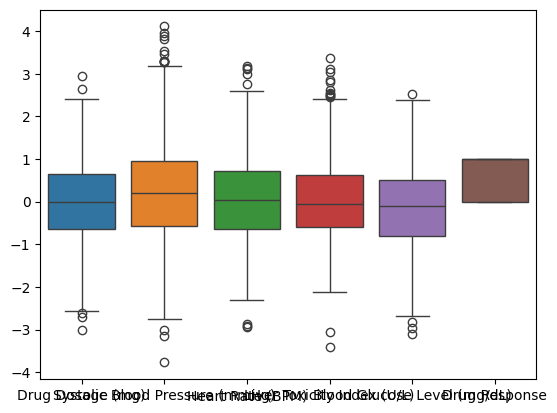

In [11]:
sns.boxplot(df)

In [12]:
def outlier_capping(df,columns):
    q1=df[columns].quantile(0.25)
    q3=df[columns].quantile(0.75)
    iqr=q3-q1
    lower_extream=q1-1.5*iqr
    upper_extream=q3+1.5*iqr
    df[columns]=df[columns].apply(lambda x:lower_extream if x<lower_extream else upper_extream if x>upper_extream else x)
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)

<Axes: >

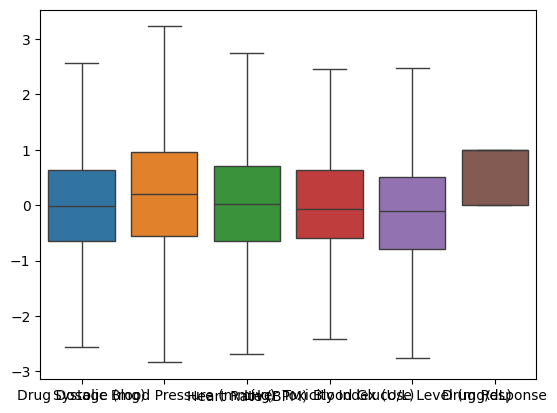

In [13]:
sns.boxplot(df)

In [15]:
cor=df.corr()

In [16]:
cor

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
Drug Dosage (mg),1.000000,0.087760,0.040512,0.128059,0.010070,0.043340
Systolic Blood Pressure (mmHg),0.087760,1.000000,-0.041466,0.273864,0.041263,0.308012
Heart Rate (BPM),0.040512,-0.041466,1.000000,0.004618,0.051423,-0.011235
Liver Toxicity Index (U/L),0.128059,0.273864,0.004618,1.000000,0.229714,0.437289
Blood Glucose Level (mg/dL),0.010070,0.041263,0.051423,0.229714,1.000000,0.169445
Drug Response,0.043340,0.308012,-0.011235,0.437289,0.169445,1.000000


<Axes: >

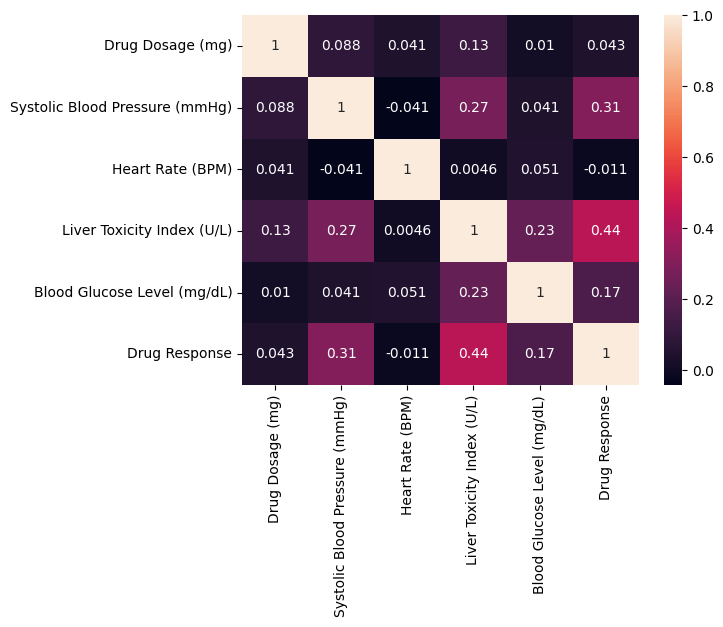

In [20]:
sns.heatmap(cor,annot=True)

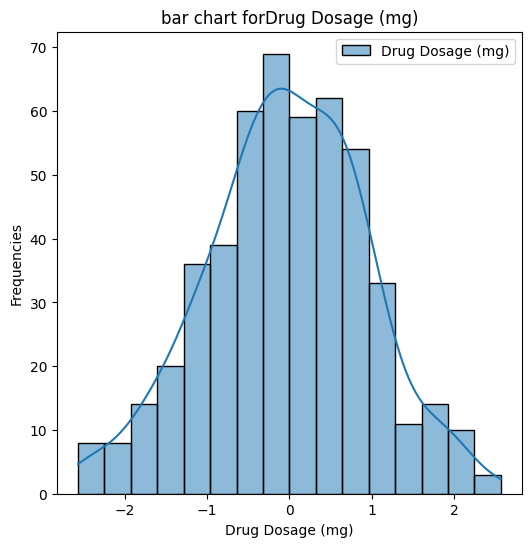

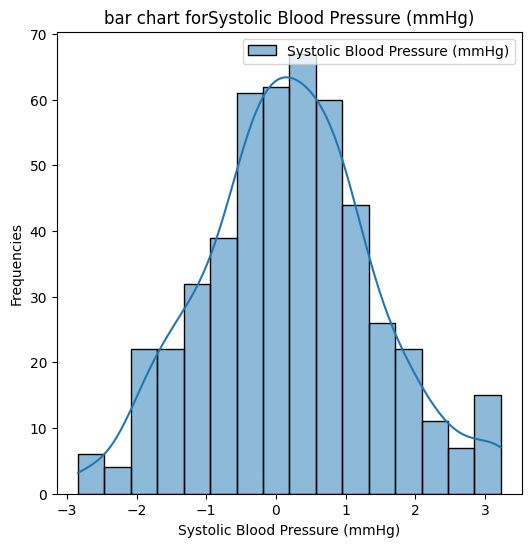

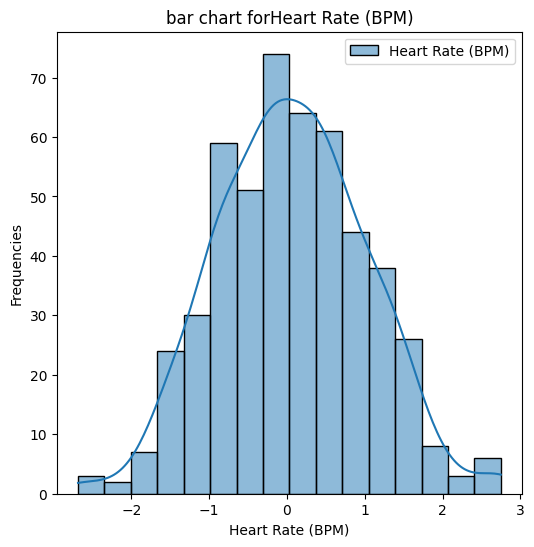

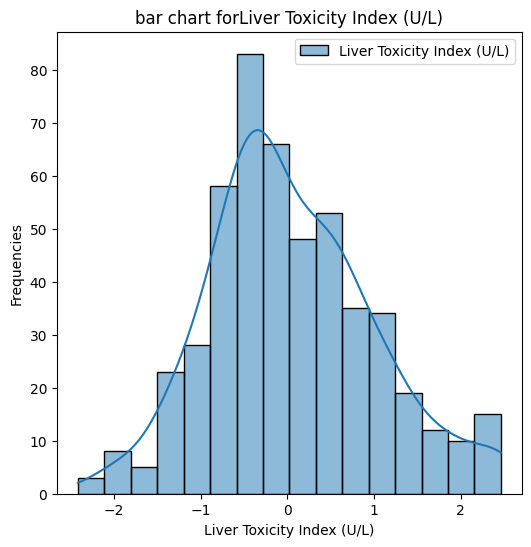

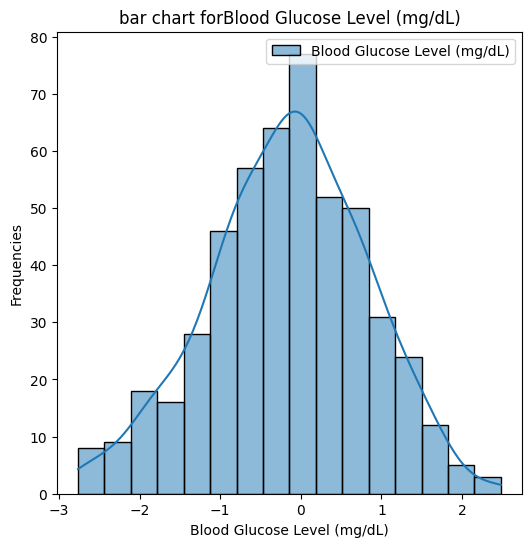

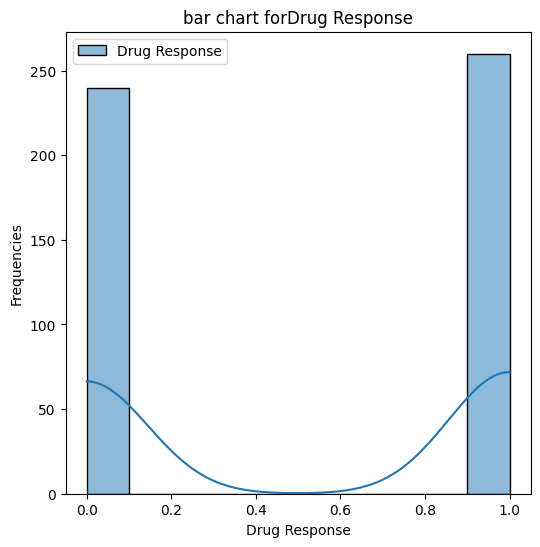

In [22]:
for col in df.columns:
    plt.figure(figsize=(6,6))
    sns.histplot(df[col],label=col,kde=True)
    plt.xlabel(col)
    plt.ylabel("Frequencies")
    plt.title(f"bar chart for{col}")
    plt.legend()
    plt.show()

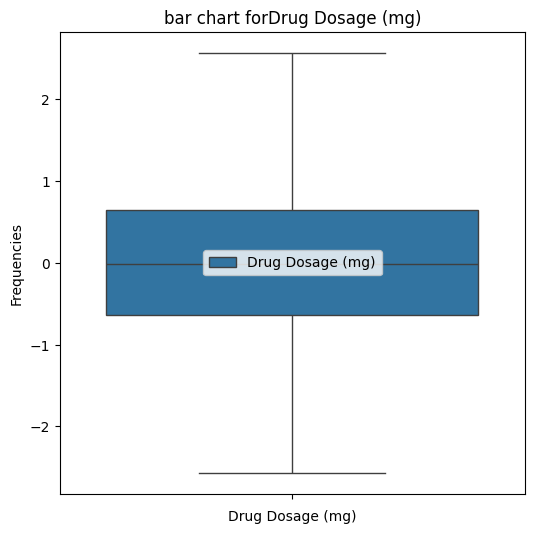

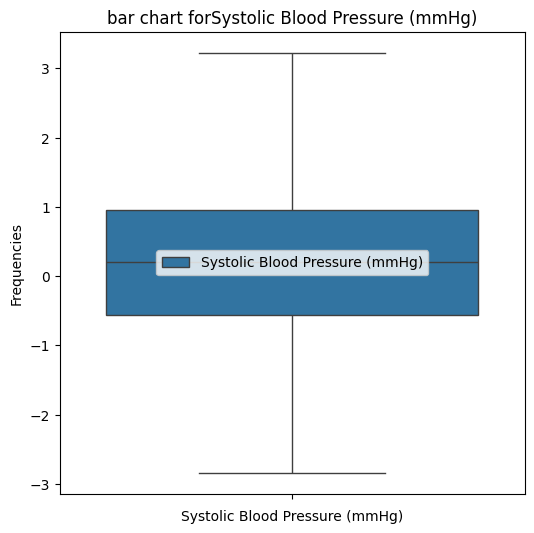

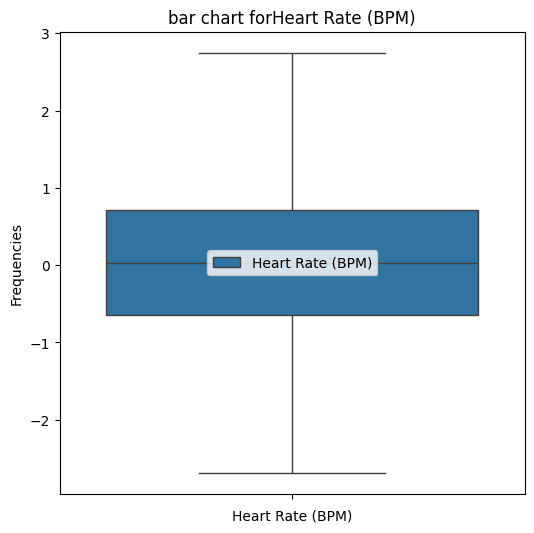

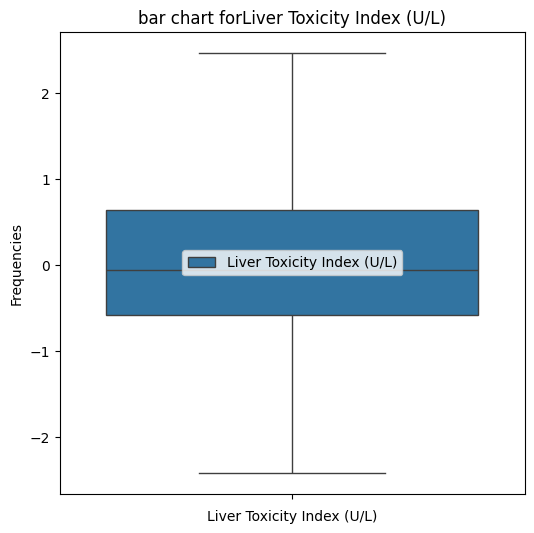

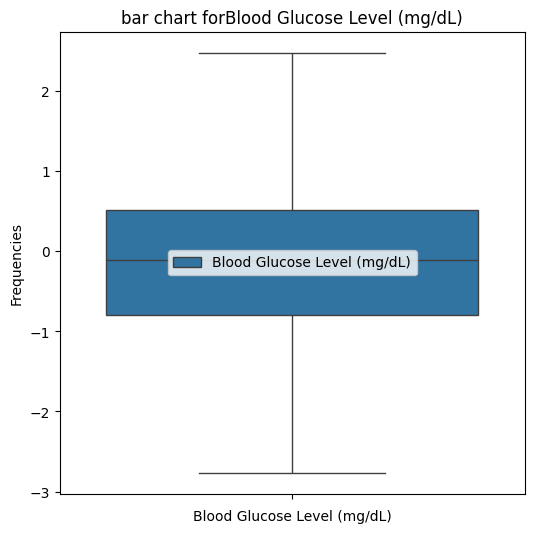

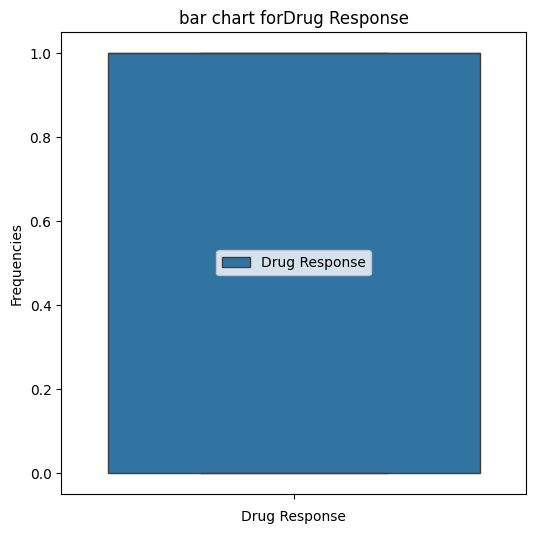

In [23]:
for col in df.columns:
    plt.figure(figsize=(6,6))
    sns.boxplot(df[col],label=col)
    plt.xlabel(col)
    plt.ylabel("Frequencies")
    plt.title(f"bar chart for{col}")
    plt.legend()
    plt.show()

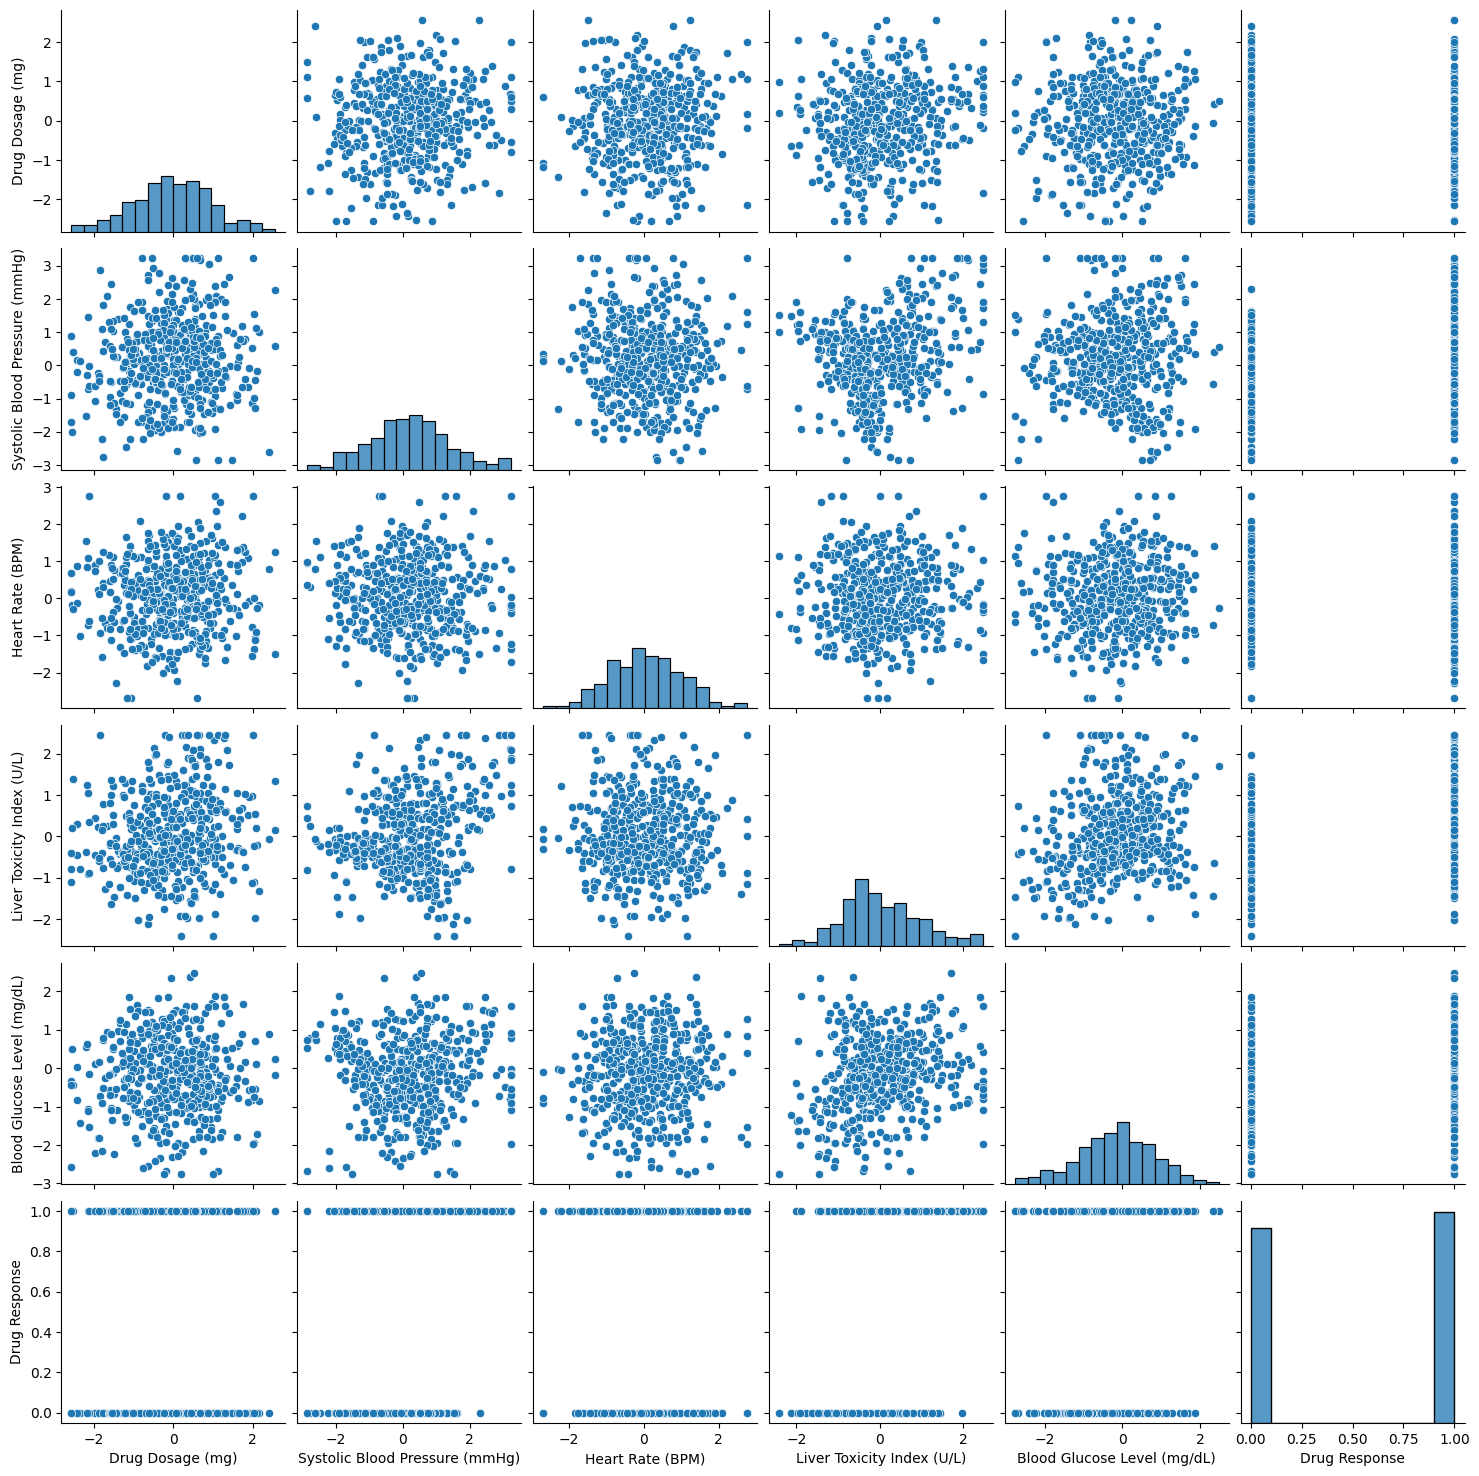

In [26]:
sns.pairplot(df)

In [27]:
targets=df[["Drug Response"]]

In [32]:
features=df.drop(columns="Drug Response")

In [33]:
features

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL)
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011
1,-1.846188,2.865142,-0.929511,2.463913,-0.719447
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355
4,0.377100,0.538410,-0.029263,1.896015,-0.960130
...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393
496,0.551476,1.714321,0.340589,1.712558,-0.496315
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838
498,1.661259,0.245759,-0.457096,0.633355,0.657413


In [34]:
targets

,Drug Response
0,1
1,1
2,0
3,1
4,1
...,...
495,0
496,1
497,1
498,0


In [38]:
scalers=StandardScaler()

In [51]:
new_features=pd.DataFrame(scalers.fit_transform(features,targets),columns=features.columns)

In [52]:
new_features

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL)
0,-0.093653,0.076329,-2.027475,0.216396,-0.634568
1,-1.859310,2.179354,-1.033829,2.520782,-0.560457
2,-1.248919,-1.438139,0.315403,-0.393395,0.369730
3,2.086681,-1.110737,-0.863911,0.965500,-0.666581
4,0.426117,0.269346,-0.094533,1.927456,-0.806274
...,...,...,...,...,...
495,-1.558708,0.243511,0.789365,-0.744309,-1.199754
496,0.605366,1.234648,0.291361,1.735784,-0.332566
497,-1.064248,-0.354164,0.185623,1.109302,-0.117599
498,1.746166,0.029110,-0.540924,0.608258,0.845771


In [61]:
f_class=f_classif(new_features,targets)

<Axes: >

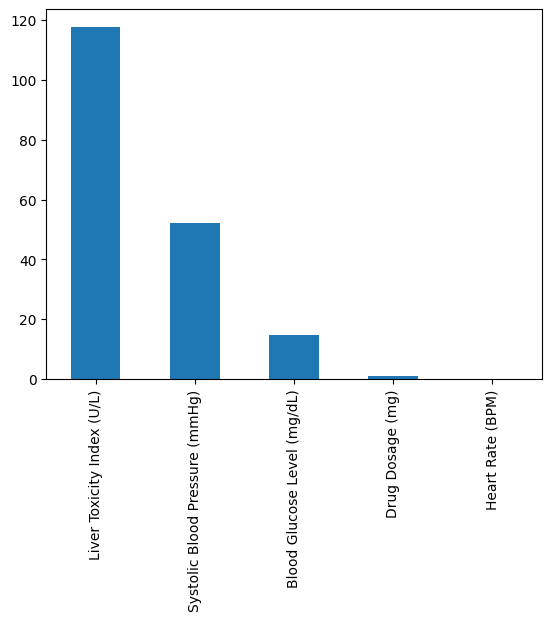

In [63]:
pd.Series(f_class[0],index=new_features.columns).sort_values(ascending=False).plot(kind="bar")

In [68]:
x_train,x_test,y_train,y_test=train_test_split(new_features,targets,test_size=0.2,random_state=42)

In [69]:
print(features.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(500, 5)
(400, 5)
(100, 5)
(400, 1)
(100, 1)


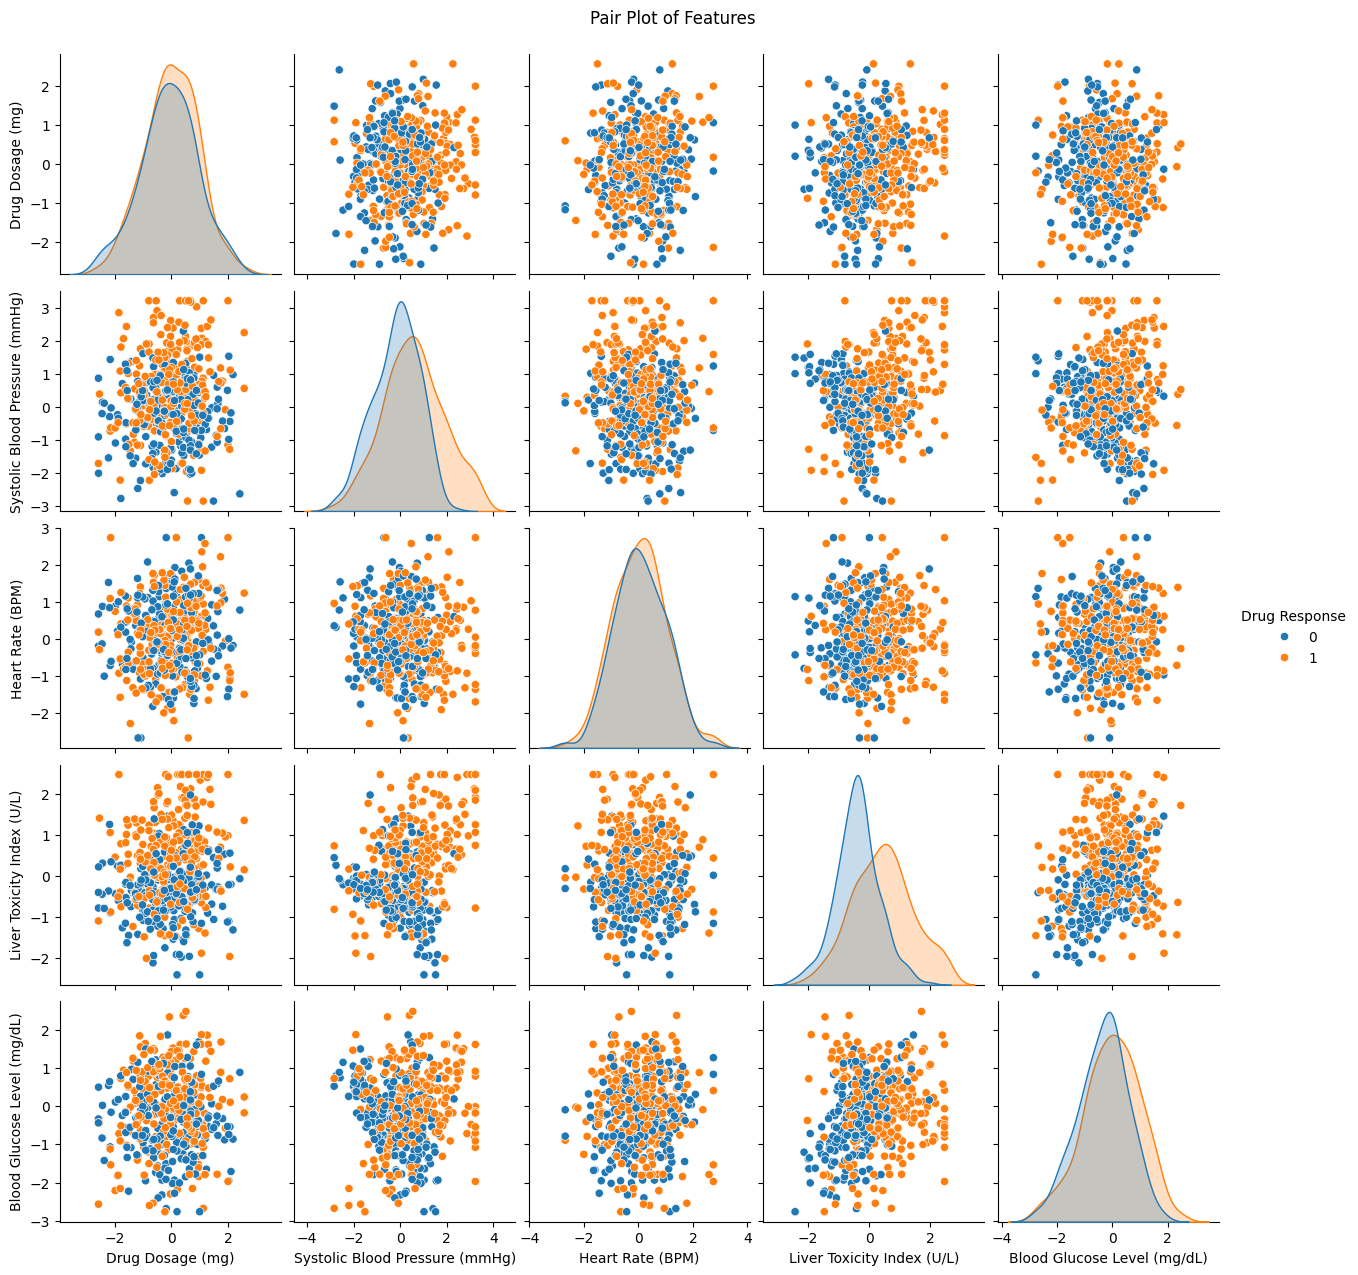

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='Drug Response')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()


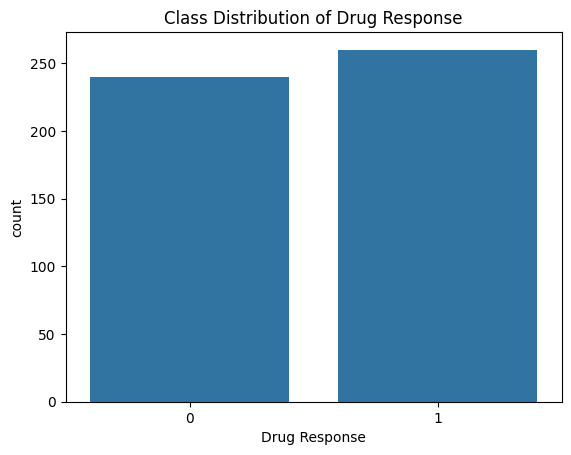

In [89]:
sns.countplot(x='Drug Response', data=df)
plt.title('Class Distribution of Drug Response')
plt.show()


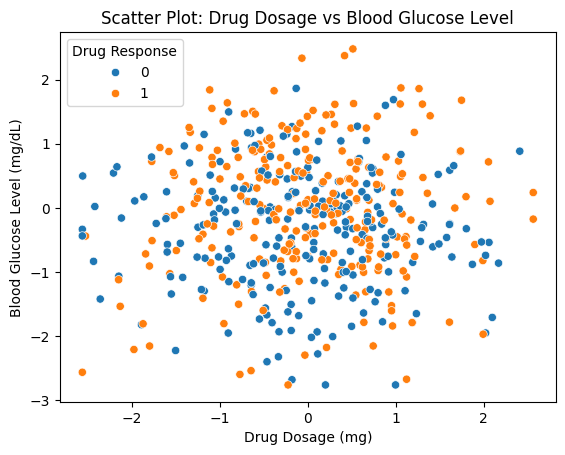

In [88]:
sns.scatterplot(data=df, x='Drug Dosage (mg)', y='Blood Glucose Level (mg/dL)', hue='Drug Response')
plt.title('Scatter Plot: Drug Dosage vs Blood Glucose Level')
plt.show()


In [82]:
svm=SVC()

In [90]:
svc=svm.fit(x_train,y_train)

In [91]:
svc

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [96]:
y_preds=svc.predict(x_test)

In [97]:
y_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [98]:
accuracy_score(y_test,y_preds)

0.84

In [100]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        44
           1       0.87      0.84      0.85        56

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



In [182]:
svm=SVC(kernel="linear",random_state=42,gamma=0.01)
svs=svm.fit(x_train,y_train)
y_preds=svs.predict(x_test)
print(y_preds)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0
 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1]


In [183]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76        44
           1       0.84      0.73      0.78        56

    accuracy                           0.77       100
   macro avg       0.77      0.78      0.77       100
weighted avg       0.78      0.77      0.77       100



Confusion Matrix for SVC(gamma=0.01, kernel='linear', random_state=42) kernel:


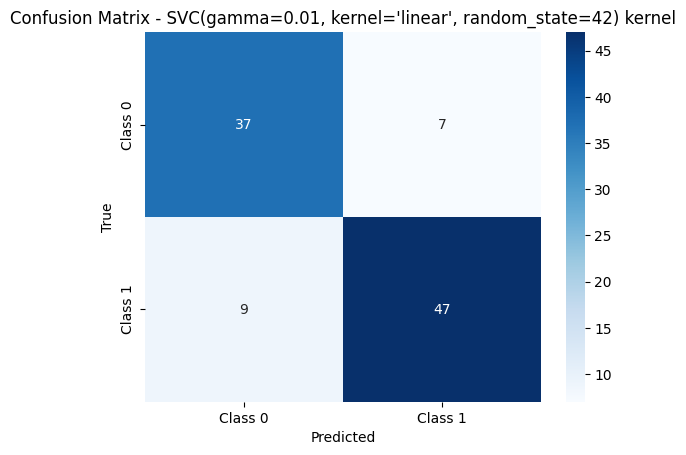

In [184]:
print(f"Confusion Matrix for {svm} kernel:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix - {svm} kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [185]:
accuracy_score(y_test,y_preds)

0.77

In [192]:
svm=SVC(kernel="poly",random_state=42,gamma=0.2)
svs=svm.fit(x_train,y_train)
y_preds=svs.predict(x_test)
print(y_preds)

[1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0
 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1]


Confusion Matrix for SVC(gamma=0.2, kernel='poly', random_state=42) kernel:


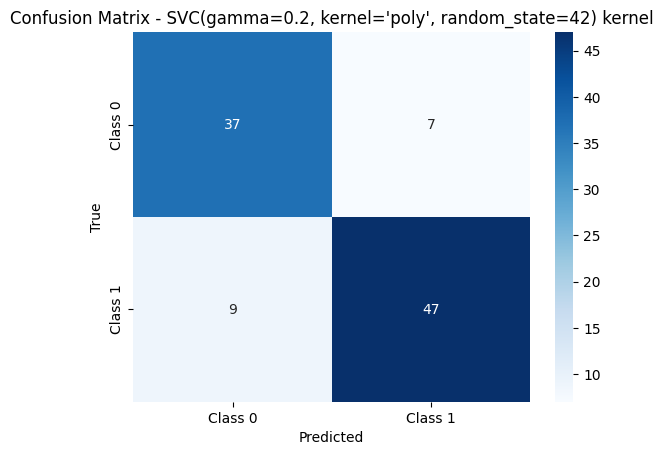

In [193]:
print(f"Confusion Matrix for {svm} kernel:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix - {svm} kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [194]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75        44
           1       0.86      0.64      0.73        56

    accuracy                           0.74       100
   macro avg       0.76      0.75      0.74       100
weighted avg       0.77      0.74      0.74       100



In [195]:
accuracy_score(y_test,y_preds)

0.74

In [196]:
svm=SVC(kernel="rbf",random_state=42,gamma=0.2)
svs=svm.fit(x_train,y_train)
y_preds=svs.predict(x_test)
print(y_preds)

[0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0
 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1
 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1]


Confusion Matrix for SVC(gamma=0.2, random_state=42) kernel:


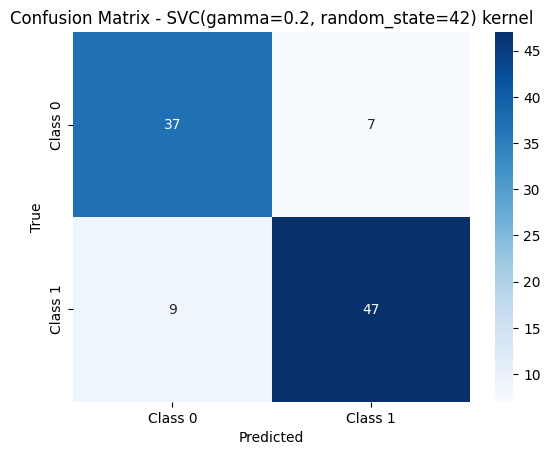

In [197]:
print(f"Confusion Matrix for {svm} kernel:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix - {svm} kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [198]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        44
           1       0.87      0.84      0.85        56

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



In [199]:
accuracy_score(y_test,y_preds)

0.84

In [200]:
svm=SVC(kernel="sigmoid",random_state=42)
svs=svm.fit(x_train,y_train)
y_preds=svs.predict(x_test)
print(y_preds)

[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0]


Confusion Matrix for SVC(kernel='sigmoid', random_state=42) kernel:


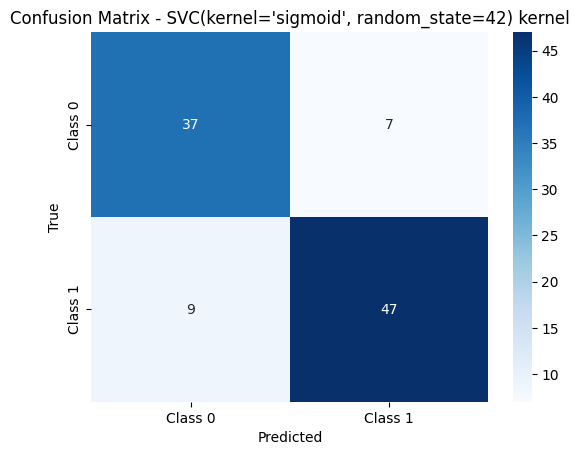

In [201]:
print(f"Confusion Matrix for {svm} kernel:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix - {svm} kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [202]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        44
           1       0.79      0.79      0.79        56

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100



In [203]:
accuracy_score(y_test,y_preds)

0.76

In [236]:
param_grids = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}


In [237]:
grid_search=GridSearchCV(SVC(),param_grids,cv=5)

In [238]:
grid_search.fit(x_train,y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.001, 0.01, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [239]:
grid_search.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [240]:
svm=SVC(kernel="rbf",C=100,gamma=0.01)
svs=svm.fit(x_train,y_train)
y_preds=svs.predict(x_test)
print(y_preds)

[0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0
 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1
 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1]


In [241]:
accuracy_score(y_test,y_preds)

0.83

In [242]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        44
           1       0.88      0.80      0.84        56

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



Confusion Matrix for SVC(C=100, gamma=0.01) kernel:


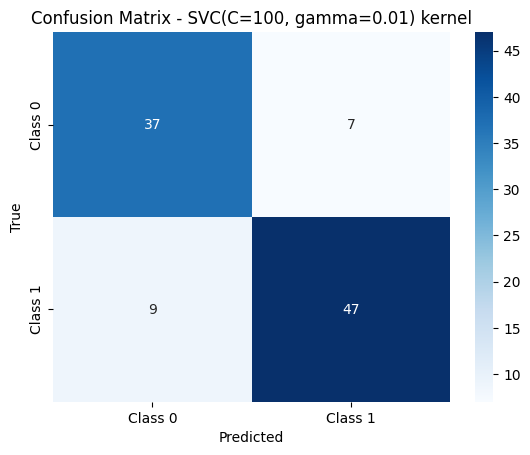

In [243]:
print(f"Confusion Matrix for {svm} kernel:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix - {svm} kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

1 .Linear
acuracy is Moderate Fast training, ideal for linearly separable data Limited to linear decision boundaries

2 . Polynomial
accuracy Moderate to High Captures non-linear relationships, flexible Computationally intensive, overfitting risk

3 . RBF
accuracy High Handles complex, non-linear data well Sensitive to hyperparameters, slower training

Strengths

High-Dimensional Data Handling: SVMs excel in scenarios where the number of features exceeds the number of samples, such as in text classification or genomics.
Effective with Clear Margins: When EDA reveals well-separated classes, SVMs can achieve high accuracy by maximizing the margin between classes.
Robustness to Overfitting: With appropriate tuning of the regularization parameter (C), SVMs can generalize well, even in high-dimensional spaces

Weaknesses

Sensitivity to Noisy Data: If EDA indicates overlapping classes or noise, SVMs may struggle, as they aim for a clear separation. 


Computational Intensity: Training SVMs on large datasets can be time-consuming and memory-intensive. 


Complex Hyperparameter Tuning: Selecting the right kernel and tuning parameters like C and gamma require careful experimentation. 

Practical Implications of SVM in Real-World Classification Tasks

SVMs have been successfully applied across various domains:

Healthcare: In cancer research, SVMs classify gene expression data to predict disease outcomes. 


Finance: SVMs are used to detect fraudulent transactions by analyzing transaction patterns. 


Image Recognition: SVMs classify images in computer vision tasks, such as face detection. 



